In [ ]:
# Excerpt from "teliki ergasia". this is what has been used to write the article on the "freedom pass" reaction

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time

# Twitter query-based scraping - 150 EUR
### ( use for article)

In [ ]:
### Code SOURCE LINK - https://github.com/datajour-gr/Data_journalism/blob/master/scraping/read_%26_save_tweets_search_colab.ipynb   ########

In [ ]:
from datetime import timedelta
from datetime import datetime as dt

In [ ]:
!pip install Twython
from twython import Twython

CONSUMER_KEY = "moGbJUrmr1d3IcDhaaJxQ72lc"
CONSUMER_SECRET = "m12HK0zHc2HgIePNjeMzZn8z80oyJEMcypsVrHSIJA3eBKa0Pw"
OAUTH_TOKEN = "1166254978480128002-RVb5mYtTjBWP3doZW6kVhKAn0B5Ue8"
OAUTH_TOKEN_SECRET = "wwsyxMoVJC6Pm3SLW9KhhxST3Gs95FmC30oh7BLjvvXRo"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets.")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="150_ευρω",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="150_ευρω",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        break

In [ ]:
tweets = pd.DataFrame(tweets)
tweets

In [ ]:
tweets.head()

In [ ]:
df = tweets[['created_at','text', 'lang', 'retweet_count']]

In [ ]:
tweets_df_q 

In [ ]:
tweets_df_q['text'][2]

'RT @Foteini78580217: "Εξαερώθηκε" η ανοσία στο #Ισραήλ - "Κούφιο" το εμβόλιο #Pfizer/#Biontech \n\nhttps://t.co/pxV2AbYT3L μέσω @YouTube \n \n#…'

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "el"].value_counts()
#αναμενόμενο τα περισσότερα ειναι στα ελληνικα

created_at                      text                                                                                                                                               lang  retweet_count
Wed Jun 30 20:48:36 +0000 2021  RT @VasoKouk: Ρισκάρεις την ζωή σου για 150 Ευρώ ; https://t.co/kbSsjmJzA6                                                                         el    13               2
Thu Jul 01 23:24:12 +0000 2021  RT @Thanos32457198: Ρε @P_Kiamos Κιάμο,σού´χουν πει ότι οι 90χρονοι ΔΕΝ ακούνε Κιάμο‼️\nΕλπίζουμε ΝΑ ΤΟ ΚΛΕΙΣΕΙΣ ΣΥΝΤΟΜΑ το χαμαιτυπείο σου…       el    3                2
Wed Jun 30 23:58:01 +0000 2021  RT @demina: Πανηλίθιοι #διπλής #150_ευρω #προνόμια #κυβερνηση_καρναβαλι #Κυβέρνηση_Μητσοτάκη https://t.co/FQZNqhR54F                               el    5                1
Sat Jul 03 16:42:11 +0000 2021  @tovimagr Πρέπει να βγούνε και τα 150 ευρώ που έταξε ο πολιτικός κρατούμενος στους νέους ώστε να εμβολιαστούν.                                     el    0   

In [ ]:
tweets_df_q[tweets_df_q['lang'] == "en"].value_counts()
# αυτα στα αγγλικά φαίνονται άσχετα

created_at                      text                                                                                                                                          lang  retweet_count
Wed Jun 30 21:21:55 +0000 2021  RT @beacon_freedom: Blast from the past! #150_ευρω                                                                                            en    1                1
Wed Jun 30 19:23:30 +0000 2021  Blast from the past! #150_ευρω https://t.co/HQ19MIspnL                                                                                        en    1                1
Wed Jun 30 12:57:51 +0000 2021  RT @nakomiGIANNIS: 3...2...1...action   #προνομια #150_ευρω #εμβολια #μασκες https://t.co/DIHioq1Chv                                          en    6                1
Wed Jun 30 11:00:26 +0000 2021  RT @sw4ggyb1tch: this didn't age well... #150_ευρω #κυβερνηση_καρναβαλι #τι_ψηφισατε_ρε_μαλακες                                               en    2                1
Wed Jun 30

In [ ]:
#tweets_df_q['lang'] = tweets_df_q[tweets_df_q['lang'] == "el"]
#tweets_df_q.drop(index, inplace=True)
#subset = tweets_df_q[tweets_df_q['lang'] == 'en']              /// check later to remove EN, there is a problem with format

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df_q.to_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')   ## this time I;m making a back-up version

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')

In [ ]:
df

In [ ]:
#df.dropna()

In [ ]:
df['created_at']

In [ ]:
#df = df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])  ## wow. scrap the rest.

In [ ]:
df['created_at']

In [ ]:
#df.to_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_3.tsv", sep='\t')   ## 3rd version with datetime

In [ ]:
#df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_3.tsv", sep='\t')

In [ ]:
df.dropna()
df.tail()

,Unnamed: 0,created_at,text,lang,retweet_count
3895,3895,Tue Jun 29 17:21:47 +0000 2021,RT @MylopYannis: Αρκούν 150 Ευρώ για να εξαγορ...,el,166
3896,3896,Tue Jun 29 17:21:46 +0000 2021,"RT @gekoyb: Συγνώμη αλλά μόλις το άκουσα, στ' ...",el,7
3897,3897,Tue Jun 29 17:21:45 +0000 2021,RT @staniotissa: Ο θεός με φύλαξε και δεν είμα...,el,41
3898,3898,Tue Jun 29 17:21:30 +0000 2021,RT @PGPapanikolaou: Το καραγκιοζιλίκι Μητσοτάκ...,el,126
3899,3899,Tue Jun 29 17:21:29 +0000 2021,"RT @indictos: Τι #150_ευρω ρε μεγάλε, δώσε 3 τ...",el,1


In [ ]:
#df.get('created_at')

In [ ]:
# indexing based on Time
#df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t', index_col ="created_at")
#df

In [ ]:
pd.to_datetime(df['created_at'])

In [ ]:
df['created_at'].dt.time(format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'],format='%a %b %d %H:%M:%S +0000 %Y')  # Length of values (1) does not match length of index (3900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['created_at']

0      2021-06-30 21:20:56+00:00
1      2021-06-30 21:20:05+00:00
2      2021-06-30 21:19:30+00:00
3      2021-06-30 21:18:56+00:00
4      2021-06-30 21:17:49+00:00
                  ...           
3895   2021-06-29 17:21:47+00:00
3896   2021-06-29 17:21:46+00:00
3897   2021-06-29 17:21:45+00:00
3898   2021-06-29 17:21:30+00:00
3899   2021-06-29 17:21:29+00:00
Name: created_at, Length: 3900, dtype: datetime64[ns, UTC]

In [ ]:
#df['created_at'] = pd.Series()

In [ ]:
df.dtypes

Unnamed: 0                     int64
created_at       datetime64[ns, UTC]
text                          object
lang                          object
retweet_count                  int64
dtype: object

In [ ]:
df['text'][300:400]

created_at
2021-06-30 17:33:27+00:00    RT @30__kai: #150_ευρω σε όποιον βρει μια σταθ...
2021-06-30 17:33:12+00:00    RT @Amorchaos2: Τρελάθηκαν οι ψεκασμένοι με τα...
2021-06-30 17:33:10+00:00                            RT @dim70: 3x #150_ευρω  
2021-06-30 17:30:44+00:00      RT @nayiahal: Προβλέπω βεντέτες για τα 150 ευρώ
2021-06-30 17:30:39+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
                                                   ...                        
2021-06-30 16:42:22+00:00    Ο αγνώστου φύλου κ ονόματος troll 0,60€/tweet ...
2021-06-30 16:41:58+00:00    RT @Silver_Spidey: Δλδ φταίει η κυβέρνηση που ...
2021-06-30 16:41:45+00:00    RT @MELETOPOULOS1: Η απόφαση εμβολιασμού δεν μ...
2021-06-30 16:40:25+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 16:39:58+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
Name: text, Length: 100, dtype: object

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

In [ ]:
df[df['text'].str.contains('στοχοποίηση')]

,Unnamed: 0,created_at,text,lang,retweet_count
19,19,2021-06-30 21:06:46+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
204,204,2021-06-30 18:46:16+00:00,"RT @AlexandrosNik: Ξύλο, στοχοποίηση, ατομική ...",el,210
1334,1334,2021-06-30 09:38:06+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
1522,1522,2021-06-30 08:16:33+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
1634,1634,2021-06-30 07:21:45+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
1642,1642,2021-06-30 07:17:50+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
2120,2120,2021-06-30 03:12:25+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
2230,2230,2021-06-30 00:16:24+00:00,https://t.co/w0E0KLk3bV\nΜετά την ανηλεή στοχο...,el,0
3355,3355,2021-06-29 19:18:12+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12
3390,3390,2021-06-29 19:11:08+00:00,RT @KatKanelidou: Ε ναι! Οι μεγάλες αλλαγές εί...,el,12


In [ ]:
df['text'].str.contains('στοχοποίηση').value_counts()

False    3887
True       13
Name: text, dtype: int64

In [ ]:
#tosplit = df['created_at'].str.split(" ", expand = True)

In [ ]:
#tosplit 

In [ ]:
#df['date'] = tosplit[0]
#df['time'] = tosplit[1]

In [ ]:
####### το πρόβλημα είανι οτι όλα ειναι από την ίδια μερα και δεν εχει νοημα να χρησιμοποιησω το date.  μόνο το time. πρεπει να ειναι σε datetime.....   df['time'] = pd.to_datetime(df['time'])

# Twitter 150 EUR - text analysis

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy
!python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df.tsv", sep='\t')

In [ ]:
df['text'] 

0       RT @NWOgohome: Παιδιά των 18-25, σκεφτείτε ότι...
1       RT @antsket: Δεν κάναμε το εμβόλιο, παλιομαλάκ...
2       RT @miltostr: Ωραία αντανακλαστικά η Aegean πο...
3       RT @akrokentrwos_2: Ο άλλος γράφει στο ινσταγκ...
4       RT @5T2qxt3ggNIwm9n: Οταν σε κυνηγανε οι μ@λ@κ...
                              ...                        
3895    RT @ChrisHolgersson: #150_ευρώ https://t.co/Rk...
3896    RT @skourkos2012: Σπιτικό σπρώξε γλύψε, κεράσι...
3897    Τα παιδιά του ντελιβερι μεγάλης αλυσίδας καφέ ...
3898    New post (“Μόνο ένας τυχάρπαστος πολιτικός εγκ...
3899    RT @EOM_memes: Άσε ρε πονηρέ... 150 ευρώ απο τ...
Name: text, Length: 3900, dtype: object

In [ ]:
textq = df['text'].str.cat(sep = ' ').replace('RT', ' ')
textq = textq.replace(r'https',' ')  
textq = textq.replace(r'://t.co', ' ')
textq = textq.replace('https', ' ')
textq = textq.replace('co', ' ')
#textq = textq.replace(r '^(.*?', ' ')
#textq = textq.replace(r '@'(.*), ' ')
#textq = textq.replace(r '(@.*), ' ')
#textq = textq.replace(ur'(^@.*? [\xe2] )?(.*)', str)
#textq = textq.replace(r'^@(.+)', ' ',) 
#textq = textq.replace(r'^(@(.+))', ' ',) 
#textq = textq.replace(r'@\S+|https?://\S+', '',)
 #textq = textq.replace(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ")
#textq = re.sub(r'@\S+|https?://\S+', '', textq)
textq 


# Can't get rid of @sdfalsdjkghdkrg

'  @NWOgohome: Παιδιά των 18-25, σκεφτείτε ότι ο πθ της χώρας σας κουνάει επιδεικτικά 150 ευρώ για να κάνετε στο σώμα σας κάτι που ως τώρα…   @antsket: Δεν κάναμε το εμβόλιο, παλιομαλάκα Μητσοτάκη, για να  μας κάνεις τους λευκούς στη Νότια Αφρική του απαρτχάιντ. Βάλε στον κωλο…   @miltostr: Ωραία αντανακλαστικά η Aegean που κάνει 300 ευρώ τα 150, θα ήταν ωραίο να τα χρησιμοποιούσε και πέρυσι όταν ξεφτιλιζόταν δίνο…   @akrokentrwos_2: Ο άλλος γράφει στο ινσταγκραμ ότι δίνει στους νέους 150 ευρώ επειδή και τα 3 παιδιά του είναι μέσα σε αυτές τις ηλικίες…   @5T2qxt3ggNIwm9n: Οταν σε κυνηγανε οι μ@λ@κιες που εχεις πει 😂🤣😂🤣 #150_ευρω   /uidpXGRhfh   @ChefTalias: Τί να κλάσουν τα 150 ευρώ ανταμοιβή, έχω προλάβει μετά το μαντού να μοιράζουν στα σχολεία δίκιλο χυμό ροδάκινο   @ManosVoularinos: Ναι ξέρω, με ΠΑΣΟΚ τόσα δίναμε για πουρμπουάρ στον ντελιβερα. Γι\' αυτό τώρα χρωστάμε τον κ@λο μας #150_ευρω   @iosif3rd: Οφείλω να παραδεχτώ ότι τα #150_ευρω είναι ένα καλό κίνητρο για τους 18-25 να βγά

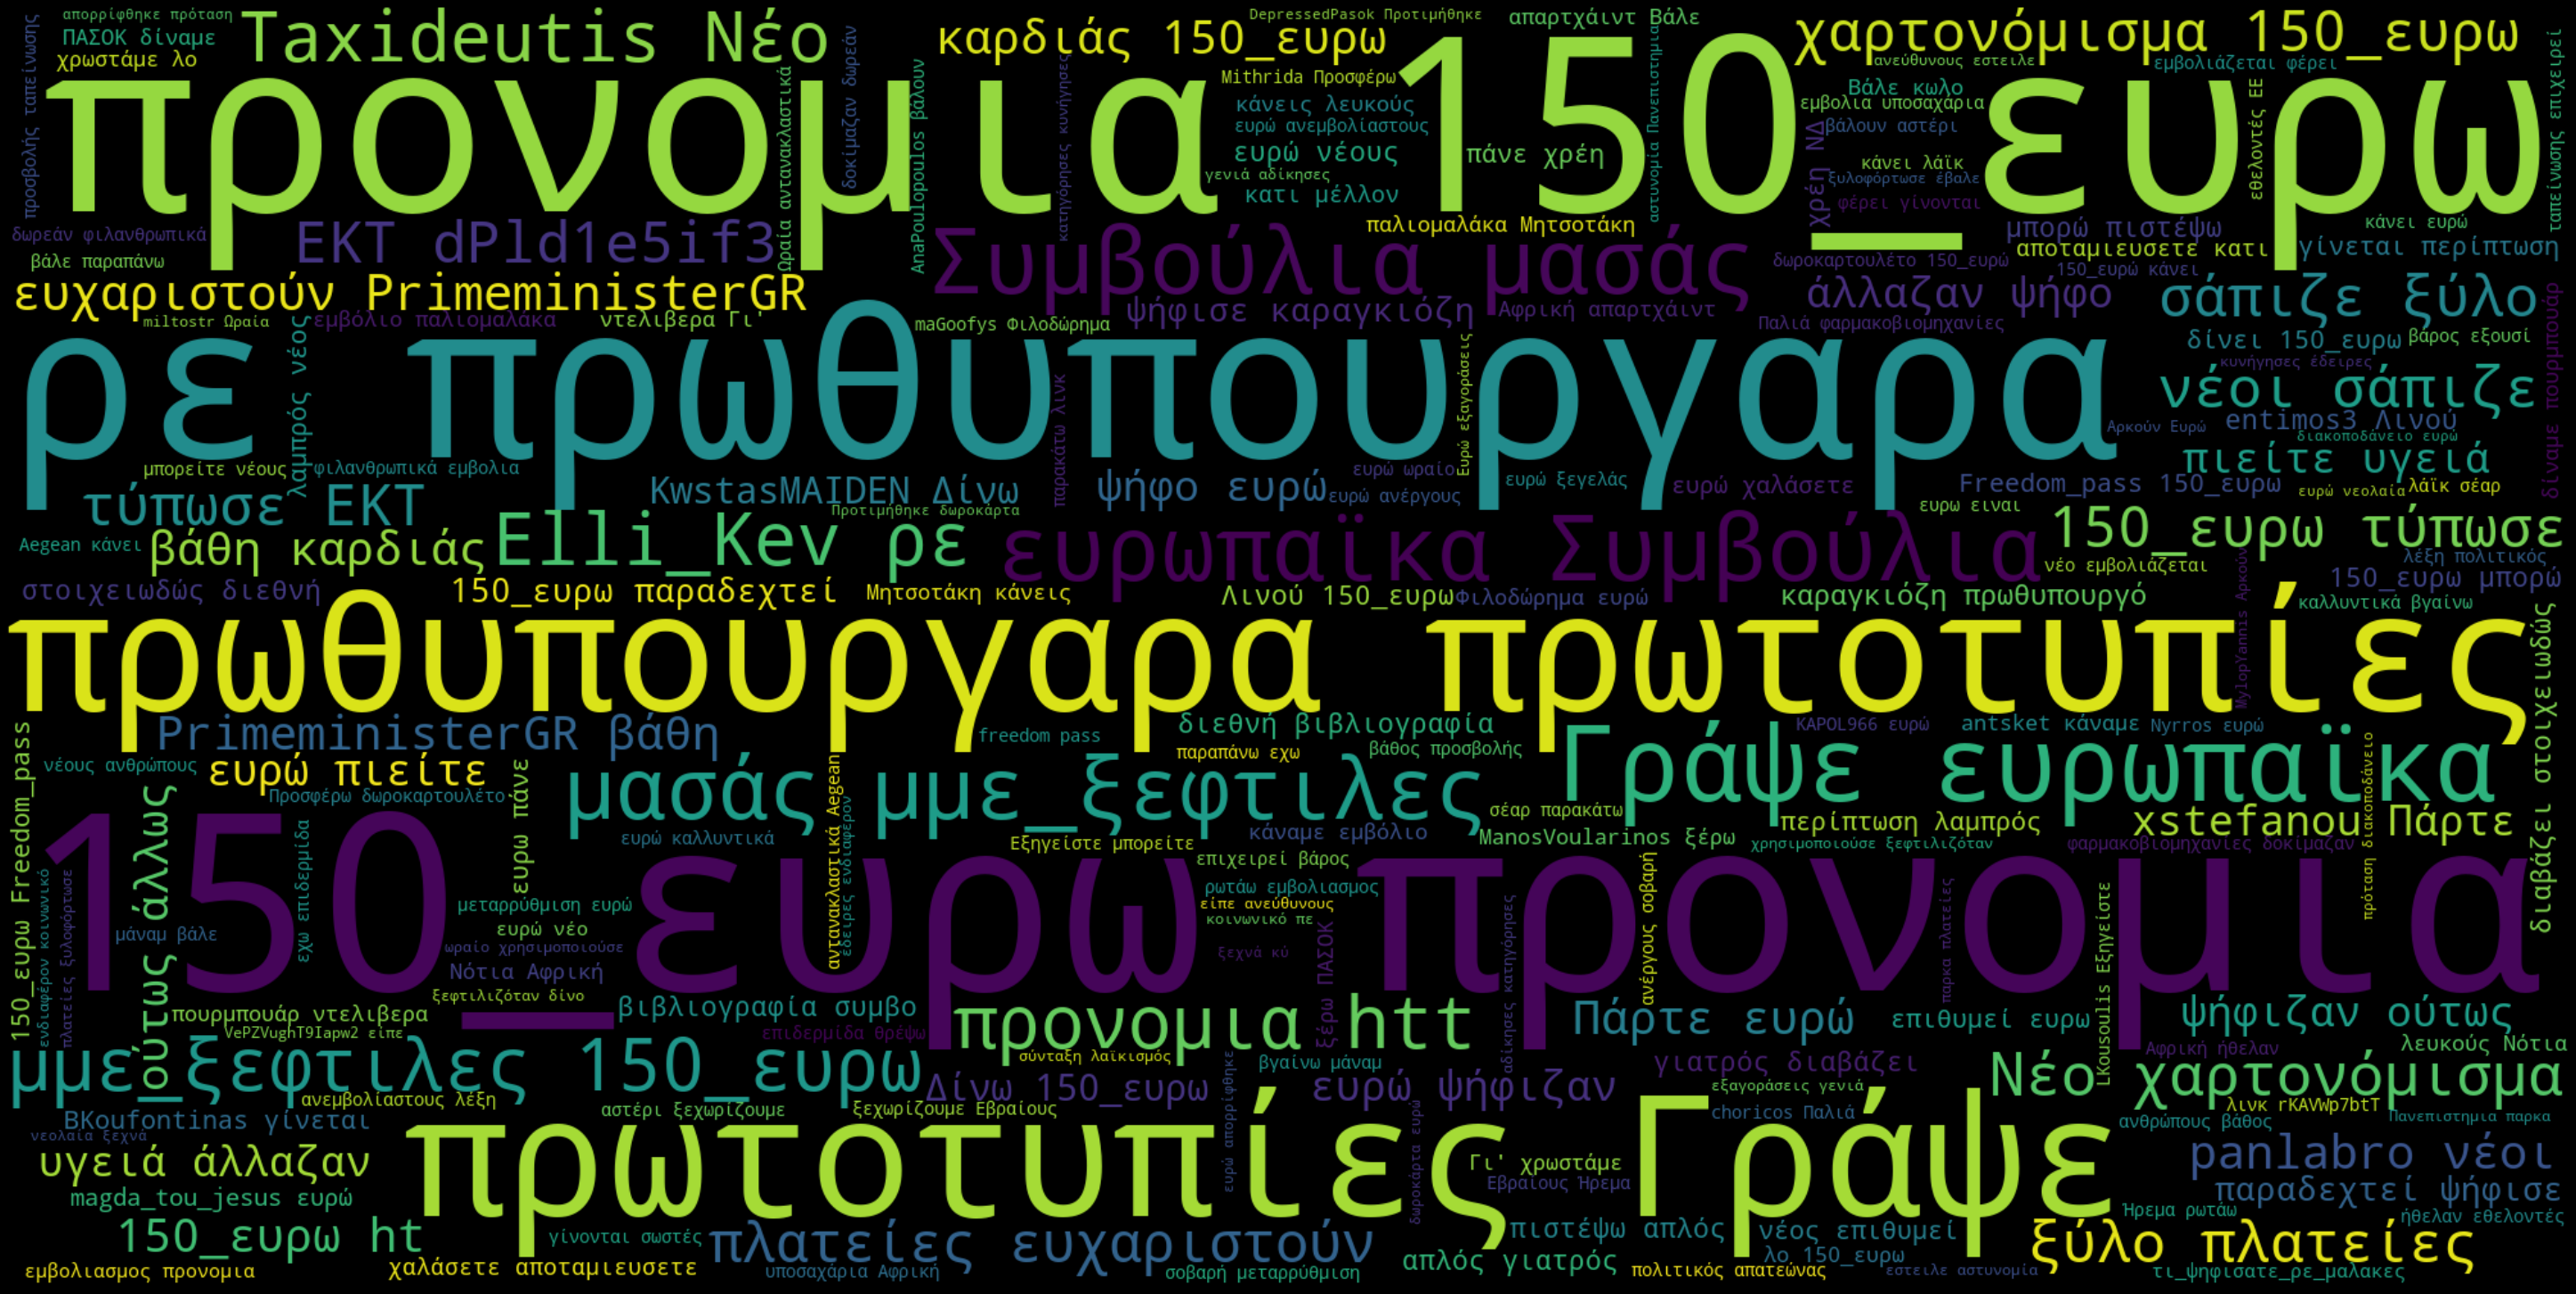

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(textq)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Vectorization - 150 Twitter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)
#min df ειναι δε θελω λεξεις με πολυ μικρη συχνοτητα.

In [ ]:
count_vector = cv.fit_transform(df['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) )
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,150 ευρω,150 ευρώ,150_ευρω https,150_ευρω προνομια,18 25,elli_kev ρε,https co,rt elli_kev,rt panlabro,rt taxideutis,γράψε ευρωπαϊκα,ευρωπαϊκα συμβούλια,μασάς μμε_ξεφτιλες,μμε_ξεφτιλες 150_ευρω,προνομια 150_ευρω,προνομια htt,πρωθυπουργαρα πρωτοτυπίες,πρωτοτυπίες γράψε,ρε πρωθυπουργαρα,συμβούλια μασάς
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(count_vector)#.toarray())

In [ ]:
print(count_vector.toarray().sum(axis=0))

[ 158 1042  215  121  167   93 1168   93   91   92   94   94   94   94
  119   93   94   94   94   94]


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(15)    ################################ ONLY THING TO ADDDDDDDD ##################

https co                     1168
150 ευρώ                     1042
150_ευρω https                215
18 25                         167
150 ευρω                      158
150_ευρω προνομια             121
προνομια 150_ευρω             119
γράψε ευρωπαϊκα                94
ρε πρωθυπουργαρα               94
συμβούλια μασάς                94
ευρωπαϊκα συμβούλια            94
μασάς μμε_ξεφτιλες             94
μμε_ξεφτιλες 150_ευρω          94
πρωθυπουργαρα πρωτοτυπίες      94
πρωτοτυπίες γράψε              94
dtype: int64

In [ ]:
results2 = results.head(15)  ## PLOT COMMON WORDS - test later
results2

In [ ]:
#results2.sort_values(ascending = False).plot(kind = 'hist')          #.hist(by="...", bins= 30)
results2.plot.hist()

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['150', 'νέοι']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,150,νέοι
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # ###########  COSINE - TEST  #### will not add 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['text'])  #finds the tfidf score with normalization


In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,000,100,13η,150,150_ευρω,150_ευρώ,150ευρω,16,18,18χρονο,1η,200,2000,2017,20_20_mag,24,24μηνη,25,25χρονο,26,30,300,30__kai,34,3θεσιος,40,400,45,50,54,65,66,_annakonda_,_vikaki_,aegean,akisfireman,amp,anapoulopoulos,antsket,apple,...,τί,ταπείνωσης,ταυτότητα,τι_ψηφισατε_ρε_μαλακες,τσίπρας,τσααα,τω,τύπωσε,υγειά,υπάρξει,υποσαχάρια,υποχρεωτικό_εμβολιασμό,υψώνουν,φέρει,φαντάζεστε,φαρμακοβιομηχανίες,φιλανθρωπικά,φιλοδώρημα,φρειδερίκης,φυσικα,φύλαξε,χέρια,χαλάσετε,χαρτζιλικουλης,χαρτονόμισμα,χθες,χρέη,χρήματα,χρησιμοποιούσε,χρωστάμε,χυμό,ψάρι,ψήφιζαν,ψήφισε,ψήφο,ψίχουλα,ψεκασμενους,ψηφαλακια,ωραία,ωραίο
0,0.0,0.0,0.0,0.264192,0.000000,0.0,0.0,0.0,0.490517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466631,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.308995,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.120023,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.306316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284058,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316876,0.322108
3,0.0,0.0,0.0,0.213195,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.168518,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.01031117 0.07792599 ... 0.45350732 0.         0.11781131]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.01031117 0.07792599 ... 0.45350732 0.         0.11781131]
 [0.01031117 1.         0.00468439 ... 0.         0.         0.00708203]
 [0.07792599 0.00468439 1.         ... 0.         0.         0.05352197]
 ...
 [0.45350732 0.         0.         ... 1.         0.14711731 0.07675337]
 [0.         0.         0.         ... 0.14711731 1.         0.13098028]
 [0.11781131 0.00708203 0.05352197 ... 0.07675337 0.13098028 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

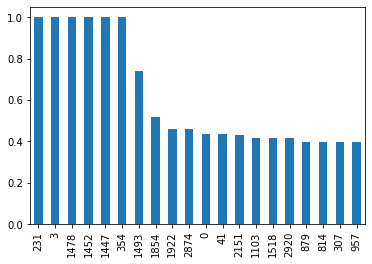

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

# Sentiment analysis - 150
### datetime needed (fixed)

In [ ]:
# source = https://github.com/datajour-gr/Data_journalism/blob/master/week10/Sentiment_analysis_GREEK.ipynb

In [ ]:
!python -m spacy download el_core_news_sm  # Libraries in case we need to re-import

In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/150EUR_df_2.tsv", sep='\t')

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])  ## Datetime conversion as previously

In [ ]:
df['text'] = df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
wordcount_df.shape

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

In [ ]:
# lists with the types of words

angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
df.set_index('created_at' , inplace=True)

In [ ]:
df[200:300]

,Unnamed: 0,text,lang,retweet_count,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
created_at,,,,,,,,,,,,,,
2021-06-30 18:47:34+00:00,200,RT @NTrachiotis: Και τα #150_ευρω θα πάρουν κα...,el,16,0,0,0,0,0,0,0,0,0,0
2021-06-30 18:47:17+00:00,201,RT @Mithrida: Προσφέρω δωροκαρτουλέτο των #150...,el,163,0,0,0,0,0,0,0,0,0,0
2021-06-30 18:46:59+00:00,202,RT @NTrachiotis: Αυτά έλεγε ο πολιτικός απατεώ...,el,35,2,1,0,2,0,0,0,0,2,0
2021-06-30 18:46:18+00:00,203,RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...,el,203,0,0,0,0,0,0,0,0,0,0
2021-06-30 18:46:16+00:00,204,"RT @AlexandrosNik: Ξύλο, στοχοποίηση, ατομική ...",el,210,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 17:35:00+00:00,295,RT @oldfileles: Το ξέρετε ότι μας κατηγορεί γι...,el,20,0,0,0,0,0,0,0,1,1,0
2021-06-30 17:34:03+00:00,296,RT @nayiahal: Προβλέπω βεντέτες για τα 150 ευρώ,el,21,0,1,0,0,1,1,1,0,0,0
2021-06-30 17:33:58+00:00,297,RT @akisFireman: Φυσικα κ θα γινει διαχωρισμος...,el,44,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

In [ ]:
#popularones = df[df['retweet_count'] > 100]['text']

In [ ]:
df[df['retweet_count'] > 100]['text'].value_counts

<bound method IndexOpsMixin.value_counts of created_at
2021-06-30 21:20:05+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 21:17:29+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 21:09:33+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 21:08:14+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
2021-06-30 20:36:53+00:00    RT @karvounopoulosp: Η Aegean στην οποία δώσαμ...
                                                   ...                        
2021-06-29 17:23:47+00:00    RT @iosif3rd: Το κάθε τουι πρέπει να αρτάρεται...
2021-06-29 17:23:31+00:00    RT @Elli_Kev: Α ρε πρωθυπουργαρα με τις πρωτοτ...
2021-06-29 17:22:26+00:00    RT @KwstasMAIDEN: Δίνω #150_ευρω σε όποιον παρ...
2021-06-29 17:21:47+00:00    RT @MylopYannis: Αρκούν 150 Ευρώ για να εξαγορ...
2021-06-29 17:21:30+00:00    RT @PGPapanikolaou: Το καραγκιοζιλίκι Μητσοτάκ...
Name: text, Length: 855, dtype: object>

In [ ]:
df[df['anger'] == 1]['text']

created_at
2021-06-30 21:17:13+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 21:15:05+00:00    RT @PoytinaIrina: Θαύμα ελληνικής οικονομίας, ...
2021-06-30 21:14:29+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 20:59:30+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
2021-06-30 20:56:30+00:00    RT @VePZVughT9Iapw2: Ζω στη χωρα που χτες μοιρ...
                                                   ...                        
2021-06-29 17:40:43+00:00    RT @stef_an: Για κάτι μήνες του λέω χάνω τα 15...
2021-06-29 17:36:00+00:00    RT @Makedni: Πρωτα φτωχοποιησατε τον Ελληνικο ...
2021-06-29 17:31:55+00:00    @NodarasSpiros Γουστάρω αντίσκηνο ρε κουράδα. ...
2021-06-29 17:31:46+00:00    RT @young3_forever: #150_ευρω...Εάν κοστολογεί...
2021-06-29 17:27:09+00:00    RT @maGoofys: Φιλοδώρημα τα 400 ευρώ στους ανέ...
Name: text, Length: 421, dtype: object

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

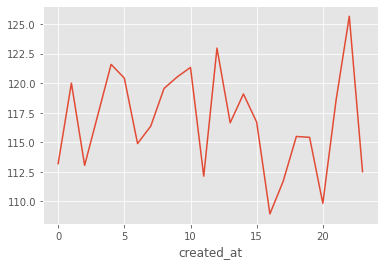

In [ ]:
df['text'].str.len().groupby(by=df.index.hour).mean().plot()  # μεσος αριθμος χαρακτήρων tweet ανά ώρα της ημέρας

In [ ]:
df['text'].str.len().mean()

116.33692307692307

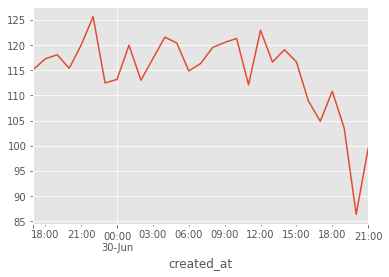

In [ ]:
df['text'].str.len().resample('H').mean().plot()   # resample link - https://stackoverflow.com/questions/17001389/pandas-resample-documentation/17001474#17001474

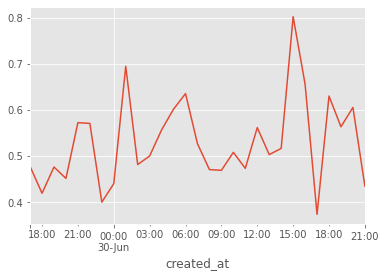

In [ ]:
df['positivity'].resample('H').mean().plot()  #sum()

In [ ]:
df['anger'].sum()

746

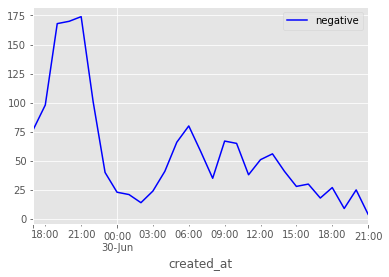

In [ ]:
df['negative'].resample('H').sum().plot(color = 'b',label = 'negative').legend()

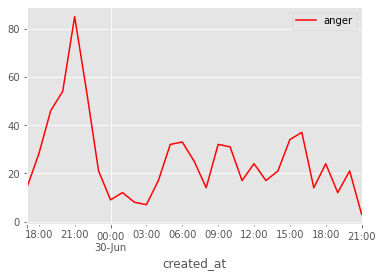

In [ ]:
df['anger'].resample('H').sum().plot(color='r', label = 'anger').legend()  #figsize=(16,4))

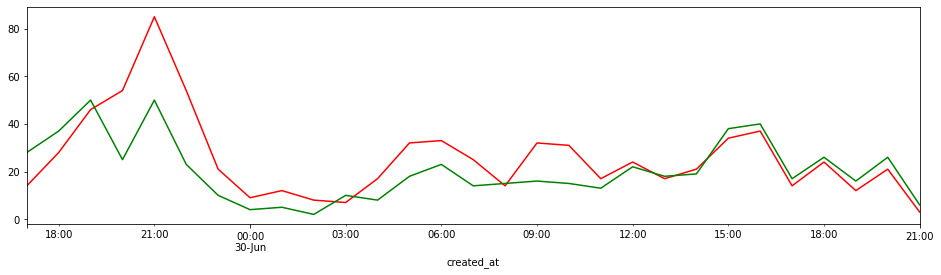

In [ ]:
ax = df['anger'].resample('H').sum().plot(figsize=(16,4), color = 'red')
df['joy'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'green')

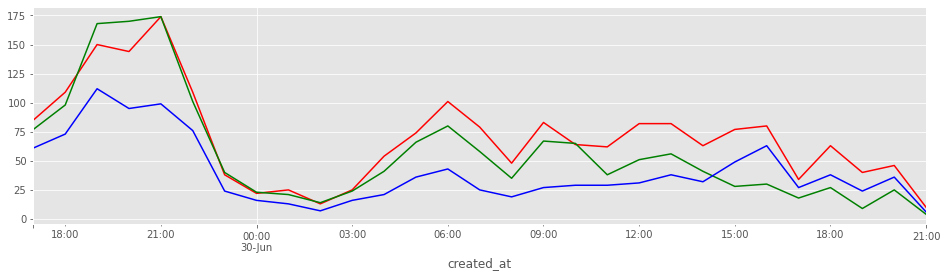

In [ ]:
ax = df['positivity'].resample('H').sum().plot(figsize=(16,4), color = 'red')
df['negative'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'green')
df['trust'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

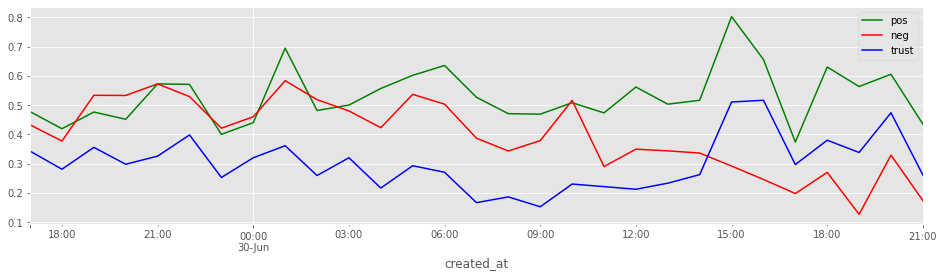

In [ ]:
ax = df['positivity'].resample('H').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
df['negative'].resample('H').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
df['trust'].resample('H').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()